# MLP numpy实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 定义一个layer
class Layer:
    def __init__(self):
        pass
    def forward(self, input):
        return input
    def backward(self, input, grad_output):
        num_units = input.shape[1]
        d_layer_d_input = np.eye(num_units)
        return np.dot(grad_output, d_layer_d_input)

In [3]:
# 定义Relu层
class ReLU(Layer):
    def __init__(self):
        pass
    def forward(self,input):
        return np.maximum(0,input)
    def backward(self,input,grad_output):
        relu_grad = input>0
        return grad_output*relu_grad

In [4]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1,initialization='xavier'):
        self.learning_rate = learning_rate
        if initialization=='xavier':
            self.weights = np.random.randn(input_units, output_units) * np.sqrt(2.0/(input_units+output_units))
        self.weights = np.random.randn(input_units, output_units)*0.01
        self.biases = np.zeros(output_units)
    def forward(self,input):
        return np.dot(input,self.weights)+self.biases
    def backward(self,input,grad_output):
        grad_input = np.dot(grad_output, self.weights.T)
        grad_weights = np.dot(input.T,grad_output)/input.shape[0]
        grad_biases = grad_output.mean(axis=0)
        self.weights = self.weights - self.learning_rate*grad_weights
        self.biases = self.biases - self.learning_rate*grad_biases
        return grad_input

In [5]:
def forward(network,X):
    activations = []
    input = X
    for layer in network:
        activations.append(layer.forward(input))
        input = activations[-1]
                
    assert len(activations) == len(network)
    return activations

In [6]:
def predict(network,X):
    logits = forward(network,X)[-1]
    return logits

In [7]:
def train(network,X,y):    
    layer_activations = forward(network,X)
    layer_inputs = [X]+layer_activations  
    logits = layer_activations[-1]
    
    loss = np.square(logits - y).sum()
    loss_grad = 2.0*(logits-y)
    
    for layer_i in range(len(network))[::-1]:
        layer = network[layer_i]
        loss_grad = layer.backward(layer_inputs[layer_i],loss_grad) #grad w.r.t. input, also weight updates
        
    return np.mean(loss)

In [35]:
x_train = np.linspace(-np.pi,0.7 * np.pi,140).reshape(140,-1)
y_train = np.sin(x_train)
x_test = np.linspace(np.pi*0.7,np.pi,60).reshape(60,-1)
y_test = np.sin(x_test)

In [26]:
l = []
for h in range(5):
    network = []
    network.append(Dense(1,100))
    network.append(ReLU())
    for _ in range(h):
        network.append(Dense(100,100))
        network.append(ReLU())
    network.append(Dense(100,1))
    losses = []
    for e in range(5000):
        ll = train(network,x,y)
        losses.append(ll)
    l.append(np.mean(losses))
    print(np.mean(losses))

3.1293878154
3.91601506302
13.896676292
93.1707041274
99.499931085


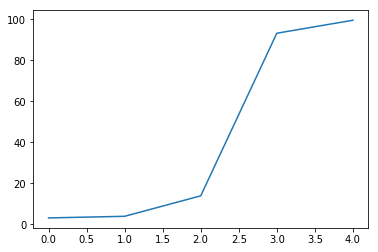

In [27]:
plt.plot(l)

In [28]:
network = []
network.append(Dense(1,100))
network.append(ReLU())
for _ in range(0):
    network.append(Dense(100,100))
    network.append(ReLU())
network.append(Dense(100,1))
losses = []
for e in range(5000):
    ll = train(network,x,y)
    losses.append(ll)

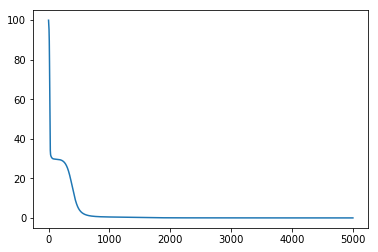

In [29]:
plt.plot(losses)

In [37]:
l = []
for h in range(100,5000,100):
    network = []
    network.append(Dense(1,h))
    network.append(ReLU())
    network.append(Dense(h,1))
    losses = []
    for e in range(5000):
        ll = train(network,x,y)
        losses.append(ll)
    l.append(np.mean(losses))
    print(np.mean(losses))

3.04162923625
2.55056031114
2.37343184162
2.34834389707
2.14563639215
2.0890546303
2.03951193241
1.96903755547
1.91728653311
1.93762374618
1.84345980049
1.82787204731
1.77004340044
1.75243912511
1.72395524528
1.72223744267
1.63216816743
1.6524198984
1.64335836822
1.5641770839
1.55006399853
1.52400658906
1.54076235624
1.49826556468
1.45777640003
1.46829033841
1.42969508127
1.42000991292
1.39969638974
1.37778088992
1.36800207991
1.38890059207
1.37362924274
1.34870262844
1.31310410828
1.2877550384
1.31336053445
1.2831030789
1.26185157015
1.24884453501
1.25882304182
1.24826875017
1.23774861695
1.22309795477
1.20138764884
1.20922207637
1.1886866113
1.16509774838
1.18121521588


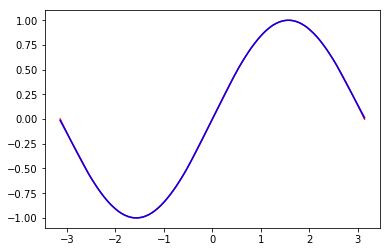

In [38]:
plt.plot(x,y,c='r')
plt.plot(x,predict(network,x),c='b')

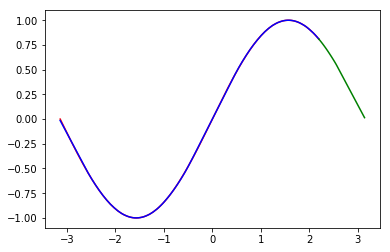

In [39]:
plt.plot(x_train,y_train,c='r')
plt.plot(x_train,predict(network,x_train),c='b')
plt.plot(x_test,predict(network,x_test),c='g')